#### Graduation project - Image Classification 

### 1. Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import cv2
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from PIL import Image
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import sys
import tensorflow.keras.utils as image


### 2. Paths

In [2]:
CURR_DIR_PATH = os.getcwd()

# Training paths
seg_train_path = CURR_DIR_PATH + "//data//seg_train//seg_train"

train_forest_path = seg_train_path + "//forest"
train_buildings_path = seg_train_path + "//buildings"
train_glacier_path = seg_train_path + "//glacier"
train_mountain_path = seg_train_path + "//mountain"
train_sea_path = seg_train_path + "//sea"
train_street_path = seg_train_path + "//street"

# Test paths
seg_test_path = CURR_DIR_PATH + "//data//seg_test//seg_test"

test_forest_path = seg_test_path + "//forest"
test_buildings_path = seg_test_path + "//buildings"
test_glacier_path = seg_test_path + "//glacier"
test_mountain_path = seg_test_path + "//mountain"
test_sea_path = seg_test_path + "//sea"
test_street_path = seg_test_path + "//street"

# Prediction path

seg_pred_path = CURR_DIR_PATH + "//data//seg_pred//seg_pred"

# Our path

seg_our_path = CURR_DIR_PATH + "//data//seg_our//seg_our"

### 3. Load and transform images

3.1 Transform images

In [3]:
image_gen = ImageDataGenerator(rotation_range=25,
                              width_shift_range=0.1,
                              height_shift_range=0.1,rescale=1/255,shear_range=0.2,
                              zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

In [7]:

one_mountain_image = train_mountain_path + "/32.jpg"

3.2 Display one image

In [8]:
def display_img(path):
    plt.figure(figsize=(2,2))
    read = cv2.imread(path)
    read_cvt = cv2.cvtColor(read ,cv2.COLOR_BGR2RGB)
    plt.imshow(read_cvt)
    plt.show()

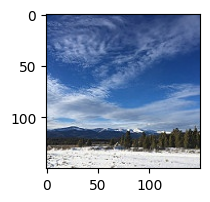

In [9]:
display_img(one_mountain_image)


### 4. Create and train model

4.1 Goes through everything in the set path/directory

In [10]:
image_gen.flow_from_directory(seg_train_path)

Found 14034 images belonging to 6 classes.


4.2 Create sequential

In [12]:
seq_model = Sequential()

4.3 Prepare model

In [13]:
seq_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)))
seq_model.add(BatchNormalization())
seq_model.add(MaxPooling2D(pool_size=(2,2)))
seq_model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
seq_model.add(BatchNormalization())
seq_model.add(MaxPooling2D(pool_size=(2,2)))
seq_model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
seq_model.add(BatchNormalization())
seq_model.add(MaxPooling2D(pool_size=(2,2)))
seq_model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
seq_model.add(BatchNormalization())
seq_model.add(MaxPooling2D(pool_size=(2,2)))
seq_model.add(Flatten())
seq_model.add(Dense(1024, activation='relu'))
seq_model.add(BatchNormalization())
seq_model.add(Dropout(0.5))
seq_model.add(Dense(512, activation='relu'))
seq_model.add(BatchNormalization())
seq_model.add(Dropout(0.5))
seq_model.add(Dense(6, activation='softmax'))
optimizer = Adam(learning_rate=0.001)
seq_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

4.4 Examine the information 

In [10]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 128)      512       
 hNormalization)                                                 
                                                        

In [11]:
training_image =image_gen.flow_from_directory( seg_train_path, 
                                              target_size=(150,150),batch_size=25)

Found 14034 images belonging to 6 classes.


#Test model


In [12]:
seg_test_path = CURR_DIR_PATH + "//data//seg_test//seg_test"
testing_image =image_gen.flow_from_directory(seg_test_path , 
                                              target_size=(150,150),batch_size=25)

Found 3000 images belonging to 6 classes.


In [45]:
steps_per_epoch = 14034//256
validation_steps =14034//256

history = seq_model.fit_generator(generator=training_image,
                              steps_per_epoch=steps_per_epoch,
                              epochs=50,
                              validation_data=testing_image,
                              validation_steps=validation_steps)

Epoch 1/50
54/54 [==============================] - 143s 3s/step - loss: 1.3191 - accuracy: 0.5407 - val_loss: 5.0402 - val_accuracy: 0.1793
Epoch 2/50
54/54 [==============================] - 142s 3s/step - loss: 1.2757 - accuracy: 0.5607 - val_loss: 3.9095 - val_accuracy: 0.2237
Epoch 3/50
54/54 [==============================] - 134s 2s/step - loss: 1.1199 - accuracy: 0.6081 - val_loss: 3.1556 - val_accuracy: 0.2356
Epoch 4/50
54/54 [==============================] - 139s 3s/step - loss: 1.1711 - accuracy: 0.5911 - val_loss: 3.1125 - val_accuracy: 0.2504
Epoch 5/50
54/54 [==============================] - 134s 2s/step - loss: 1.0769 - accuracy: 0.6289 - val_loss: 1.6818 - val_accuracy: 0.4385
Epoch 6/50
54/54 [==============================] - 128s 2s/step - loss: 0.9874 - accuracy: 0.6400 - val_loss: 2.2700 - val_accuracy: 0.3526
Epoch 7/50
54/54 [==============================] - 123s 2s/step - loss: 0.9572 - accuracy: 0.6578 - val_loss: 1.1264 - val_accuracy: 0.5719
Epoch 8/50
54

Saving the result of the model

In [46]:
seq_model.save("image_class.h5")

In [16]:
def processing(path):
    img = cv2.imread(path)
    test1_proc = image.load_img(path , target_size=(150,150))
    test1_proc_1 = image.img_to_array(test1_proc)
    t1 = np.expand_dims(test1_proc ,axis=0)
    t1 = t1/255
    pred_classes = seq_model.predict(t1)
    pred = np.argmax(pred_classes ,axis=1)

    plt.subplot(121)
    pic = Image.open(path) 
    plt.xlabel("Original Image")
    plt.imshow(pic)
    
    
    plt.subplot(122)

    s1 = pd.Series(pred_classes.ravel() , index = training_image.class_indices.keys())
    s1.plot(kind = 'bar' ,figsize = (10,5))
    plt.xlabel("prediction")
    
    plt.show()

    for i in training_image.class_indices:
        if pred == training_image.class_indices[i]:
            print("prediction made by model is :" ,i)


1/1 [==============================] - 0s 46ms/step


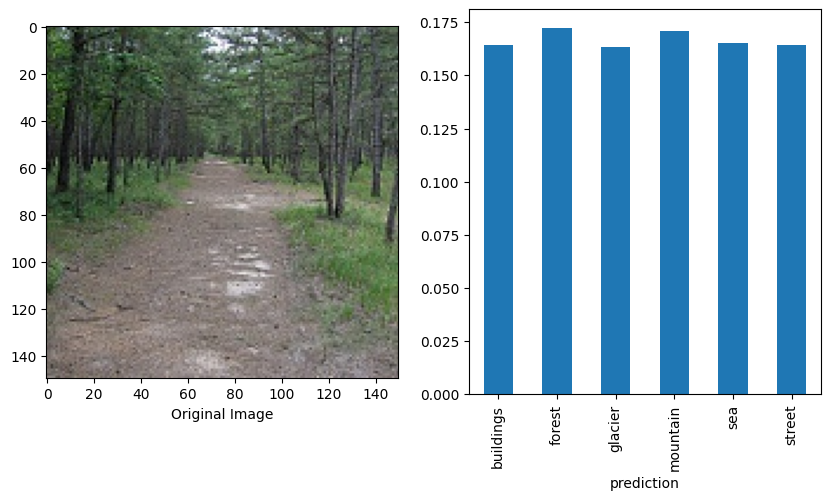

prediction made by model is : forest


In [24]:
processing(seg_test_path + "/forest/20056.jpg")


#import tensorflow.keras.utils as image
#processing(buildings_path)

1/1 [==============================] - 0s 55ms/step


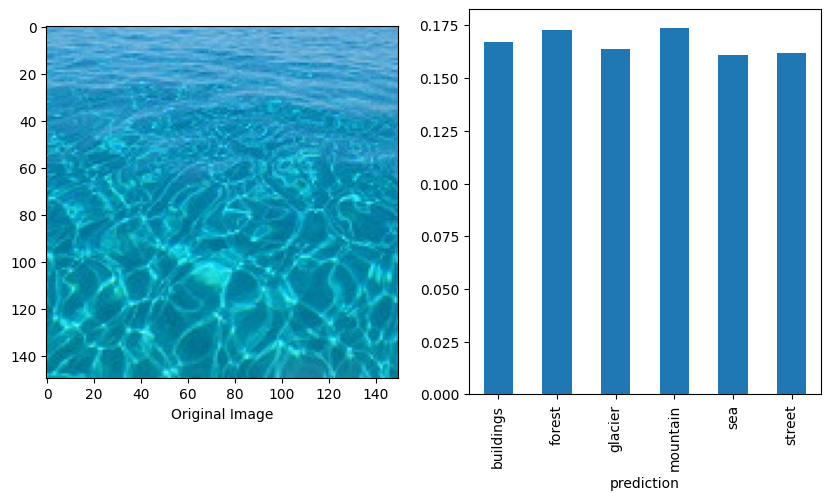

prediction made by model is : mountain


In [34]:
processing(test_sea_path + "//21259.jpg")

1/1 [==============================] - 0s 49ms/step


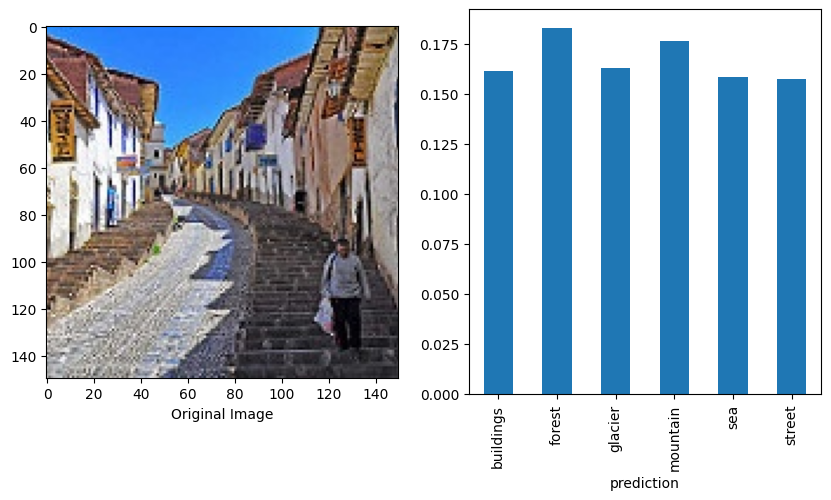

prediction made by model is : forest


In [41]:
processing(test_street_path + "/20297.jpg")

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

Evaluate/analyze

Plot